In [7]:
# What affects backflow the most: temperature or pressure
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [8]:
# get all csv and store as pandas dataframe
chunk = pd.read_csv('../data/backflow_data.csv',chunksize=1001, sep=",")
pd_df = pd.concat(chunk)
df = pd.DataFrame(pd_df)

In [9]:
# quick sort implementation
def quickSort(arr, ascending=True):
    if arr == []:
        return arr
    smaller, equal, larger = [], [], []
    pivot = arr[random.randint(0, len(arr) - 1)]
    for x in arr:
        if x < pivot: smaller.append(x)
        elif x == pivot: equal.append(x)
        else: larger.append(x)
    larger = quickSort(larger, ascending=ascending)
    smaller = quickSort(smaller, ascending=ascending)
    if ascending:
        final = smaller + equal + larger
    else:
        final = larger + equal + smaller
    return final

In [10]:
# return avgs of data for each interval
# adjusted to replicate data from spreadsheet
def getAvgData(data, interval, isAscending=True):
    avgs = []
    desiredInterval = interval
    counter=0
    intervalCounter = 0
    total = 0
    for temp in data:
        total = total + float(temp.split("%")[0])
        counter = counter +1
        if intervalCounter ==0: interval = 192
        else: interval = desiredInterval
        # avg temperatures for each n rows
        if counter % interval == 0:
            avg = total / counter 
            avgs.append(avg)
            avg = 0
            counter = 0
            total = 0 
        intervalCounter = intervalCounter  +1
    if isAscending:
        return pd.DataFrame(quickSort(avgs, ascending=True))
    return pd.DataFrame(quickSort(avgs, ascending=False))

In [11]:
# avg of avg backflows (last column in provided excel sheet)
def getAvgAvgBackflows(avgBackflows, interval, isAscending=True):
    avgs = []
    counter = 0
    total = 0
    for avgbackflow in avgBackflows:
        total = total + avgbackflow
        counter = counter +1
        # avg for each 2 avg backflows
        if counter % interval == 0:
            avg = total / counter 
            #avgs.append(str(avg*100)+"%")
            avgs.append(avg)
            avg = 0
            counter = 0
            total =0
    if isAscending:
        return pd.DataFrame(quickSort(avgs, ascending=True))
    return pd.DataFrame(quickSort(avgs, ascending=False))

In [12]:
# plot data on scatter plot
def scatterPlotData(data, label, color):
    y = np.array(data)
    x = np.array(range(0, len(data)))
    plt.scatter(x, y, c=color)
    plt.xlabel("Avg at each interval")
    plt.ylabel(label)
    plt.show()

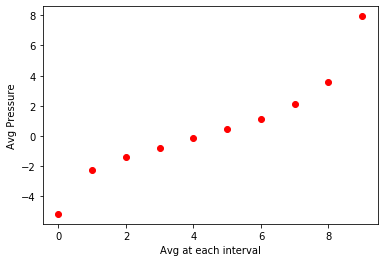

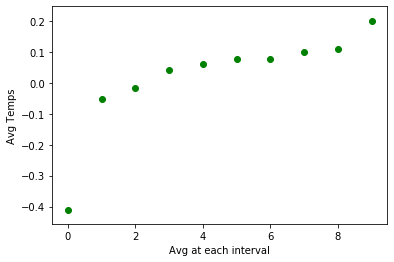

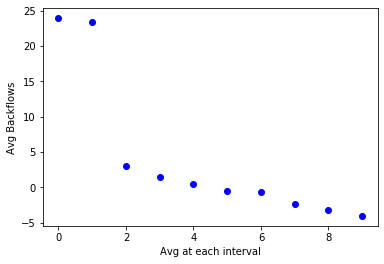

In [22]:
# get avg data for each 100 rows

avgtemps = getAvgData(df['Temp'], 99, isAscending=True)
avgpressure = getAvgData(df['Pressure'], 99, isAscending=True)
avgbackflows = getAvgData(df['Backflow'], 99, isAscending=False)

scatterPlotData(avgpressure, "Avg Pressure", 'r')
scatterPlotData(avgtemps, "Avg Temps", 'g')
scatterPlotData(avgbackflows, "Avg Backflows", 'b')


In [14]:
dfconcat = pd.concat([avgtemps, avgpressure, avgbackflows],axis='columns', keys=['Avg Temps', 'Avg Pressure', 'Avg Backflow'])
df_data = dfconcat.swaplevel(axis='columns')
df_data

0                          
  Avg Temps Avg Pressure Avg Backflow
0 -0.409798    -5.148586    23.927475
1 -0.053333    -2.255152    23.438485
2 -0.016061    -1.402323     2.951515
3  0.040404    -0.792323     1.447172
4  0.061212    -0.136768     0.472222
5  0.077475     0.464242    -0.521616
6  0.078182     1.128283    -0.738485
7  0.100505     2.130707    -2.314646
8  0.110000     3.596768    -3.187374
9  0.200909     7.925253    -4.052828

In [15]:
# avg of avg backflow
dfconcat = pd.concat([getAvgAvgBackflows(avgbackflows.values, 2)],axis='columns', keys=['Avg Avg Backflow'])
df_avgAvgBF = dfconcat.swaplevel(axis='columns')
df_avgAvgBF

,0
,Avg Avg Backflow
0,-3.620101
1,-1.526566
2,-0.024697
3,2.199343
4,23.682980


In [18]:
#Replicate backflow data in Excel sheet
def backflowData():
    total =0
    i =0
    avgs = []
    restofdata =[]
    testdata=[]
    for temp in df['Backflow']:
        total = total + float(temp.split("%")[0])
        i = i+1
        if i == 190: 
            avgs.append(total/i)
            total =0
        if i > 99:
            restofdata.append(float(temp.split("%")[0]))
        if i > 98: 
            testdata.append(float(temp.split("%")[0]))
    j =0
    total =0
    for data in restofdata:
        total = total + data
        j = j+1
        if j % 100 ==0:
            avgs.append(total/100)
            total =0
    k =0
    total=0
    for d in testdata:
        total = total + d
        k = k+1
        if k == 801:
            avgs.append(total/801)
    return avgs
            



In [21]:
avgs = backflowData()
print("BACKFLOW DATA: ")
print("AVERAGE (D2 to D192 in the excel sheet) =  " + str(avgs[0]))
print("AVERAGE (D101 to D200 in the excel sheet) =  " + str(avgs[1]))
print("AVERAGE (D201 to D300 in the excel sheet) =  " + str(avgs[2]))
print("AVERAGE (D301 to D400 in the excel sheet) =  " + str(avgs[3]))
print("AVERAGE (D401 to D500 in the excel sheet) =  " + str(avgs[4]))
print("AVERAGE (D501 to D600 in the excel sheet) =  " + str(avgs[5]))
print("AVERAGE (D601 to D700 in the excel sheet) =  " + str(avgs[6]))
print("AVERAGE (D701 to D800 in the excel sheet) =  " + str(avgs[7]))
print("AVERAGE (D801 to D900 in the excel sheet) =  " + str(avgs[8]))
print("AVERAGE (D100 to D901 in the excel sheet) =  " + str(avgs[len(avgs)-1]))
f2f7 = (avgs[0] - avgs[5]) 
f3f8 = avgs[1]-avgs[6]
f4f9= avgs[2]-avgs[7]
f5f10 = avgs[3]-avgs[8]
f6f11 = avgs[4] -avgs[len(avgs)-1]
print("F2 to F7 in the excel sheet =  " + str(f2f7))
print("F3 to F8 in the excel sheet =  " + str(f3f8))
print("F4 to F9 in the excel sheet =  " + str(f4f9))
print("F5 to F10 in the excel sheet =  " + str(f5f10))
print("F6 to F11 in the excel sheet =  " + str(f6f11))

BACKFLOW DATA: 
AVERAGE (D2 to D192 in the excel sheet) =  13.017473684210522
AVERAGE (D101 to D200 in the excel sheet) =  1.202399999999999
AVERAGE (D201 to D300 in the excel sheet) =  -3.744000000000001
AVERAGE (D301 to D400 in the excel sheet) =  -0.9768000000000001
AVERAGE (D401 to D500 in the excel sheet) =  3.125199999999999
AVERAGE (D501 to D600 in the excel sheet) =  -2.8387000000000007
AVERAGE (D601 to D700 in the excel sheet) =  -0.2355999999999999
AVERAGE (D701 to D800 in the excel sheet) =  -1.6634000000000042
AVERAGE (D801 to D900 in the excel sheet) =  -1.1704
AVERAGE (D100 to D901 in the excel sheet) =  -0.7566916354556803
F2 to F7 in the excel sheet =  15.856173684210523
F3 to F8 in the excel sheet =  1.4379999999999988
F4 to F9 in the excel sheet =  -2.080599999999997
F5 to F10 in the excel sheet =  0.1936
F6 to F11 in the excel sheet =  3.8818916354556796


In [20]:
# function to add 2 rows
# function to subtract 2 rows
